In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



In [6]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    # print(eng)
    return create_engine(eng)

In [13]:
engine = new_engine('mssql', 'GABRIEL\MSSQLSERVER01', 'AdventureWorks2022', integrated_security=True)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\gabej\AppData\Local\Temp\ipykernel_21096\2046141422.py:1: SyntaxWarning: invalid escape sequence '\M'
  engine = new_engine('mssql', 'GABRIEL\MSSQLSERVER01', 'AdventureWorks2022', integrated_security=True)


In [9]:
print (engine.dialect)

In [11]:
connection = engine.connect()
if not connection.closed:
    print("Connection is open.")

Connection is open.


In [ ]:
inspector = inspect(engine)

In [16]:
query = """
SELECT
    E.BusinessEntityID,
    E.JobTitle,
    E.BirthDate,
    E.MaritalStatus,
    E.Gender,
    E.HireDate,
    E.ModifiedDate,
    EDH.DepartmentID,
    D.Name AS DepartmentName,
    DATEDIFF(YEAR, E.BirthDate, GETDATE()) AS Age
FROM
    HumanResources.Employee AS E
JOIN
    HumanResources.EmployeeDepartmentHistory AS EDH ON E.BusinessEntityID = EDH.BusinessEntityID
JOIN
    HumanResources.Department AS D ON EDH.DepartmentID = D.DepartmentID
WHERE
    EDH.EndDate IS NULL; -- To get the current department assignment
"""
employee_data = pd.read_sql(query, con=connection)
employee_data 

,BusinessEntityID,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,ModifiedDate,DepartmentID,DepartmentName,Age
0,1,Chief Executive Officer,1969-01-29,S,M,2009-01-14,2014-06-30,16,Executive,55
1,2,Vice President of Engineering,1971-08-01,S,F,2008-01-31,2014-06-30,1,Engineering,53
2,3,Engineering Manager,1974-11-12,M,M,2007-11-11,2014-06-30,1,Engineering,50
3,4,Senior Tool Designer,1974-12-23,S,M,2007-12-05,2014-06-30,2,Tool Design,50
4,5,Design Engineer,1952-09-27,M,F,2008-01-06,2014-06-30,1,Engineering,72
...,...,...,...,...,...,...,...,...,...,...
285,286,Sales Representative,1977-02-14,S,F,2013-05-30,2014-06-30,3,Sales,47
286,287,European Sales Manager,1957-09-20,M,F,2012-04-16,2014-06-30,3,Sales,67
287,288,Sales Representative,1975-07-09,S,F,2013-05-30,2014-06-30,3,Sales,49
288,289,Sales Representative,1968-03-17,M,F,2012-05-30,2014-06-30,3,Sales,56


In [18]:
import pandas as pd
import random
query = """
SELECT top 67
    E.JobTitle,
    EDH.BusinessEntityID,
    E.BirthDate,
    E.HireDate
FROM
    HumanResources.Employee AS E
JOIN
    HumanResources.EmployeeDepartmentHistory AS EDH ON E.BusinessEntityID = EDH.BusinessEntityID
WHERE
    EDH.EndDate IS NULL;
"""






# Konverterar datetime-format
employee_data['BirthDate'] = pd.to_datetime(employee_data['BirthDate'])
employee_data['HireDate'] = pd.to_datetime(employee_data['HireDate'])

# Beräkna  'AgeWhenHired' genom att ta skillnaden i år
employee_data['AgeWhenHired'] = (employee_data['HireDate'].dt.year - employee_data['BirthDate'].dt.year).astype(int)

# Gruppera efter 'JobTitle' o beräkna beskrivande statistik
occupation_stats = employee_data.groupby('JobTitle')['AgeWhenHired'].agg(['min', 'max', 'mean']).reset_index()


pd.set_option('display.max_rows', None)
print(occupation_stats)


                                    JobTitle  min  max       mean
0                                 Accountant   30   33  31.500000
1                           Accounts Manager   26   26  26.000000
2                Accounts Payable Specialist   30   32  31.000000
3             Accounts Receivable Specialist   25   33  30.000000
4                     Application Specialist   21   31  24.250000
5   Assistant to the Chief Financial Officer   45   45  45.000000
6                        Benefits Specialist   24   24  24.000000
7                                      Buyer   25   58  39.444444
8                    Chief Executive Officer   40   40  40.000000
9                    Chief Financial Officer   33   33  33.000000
10                        Control Specialist   18   22  20.000000
11                    Database Administrator   33   34  33.500000
12                           Design Engineer   49   56  51.666667
13                Document Control Assistant   22   34  28.000000
14        

In [19]:
x = np.array(employee_data["AgeWhenHired"])

y = np.array(employee_data["BusinessEntityID"])
          

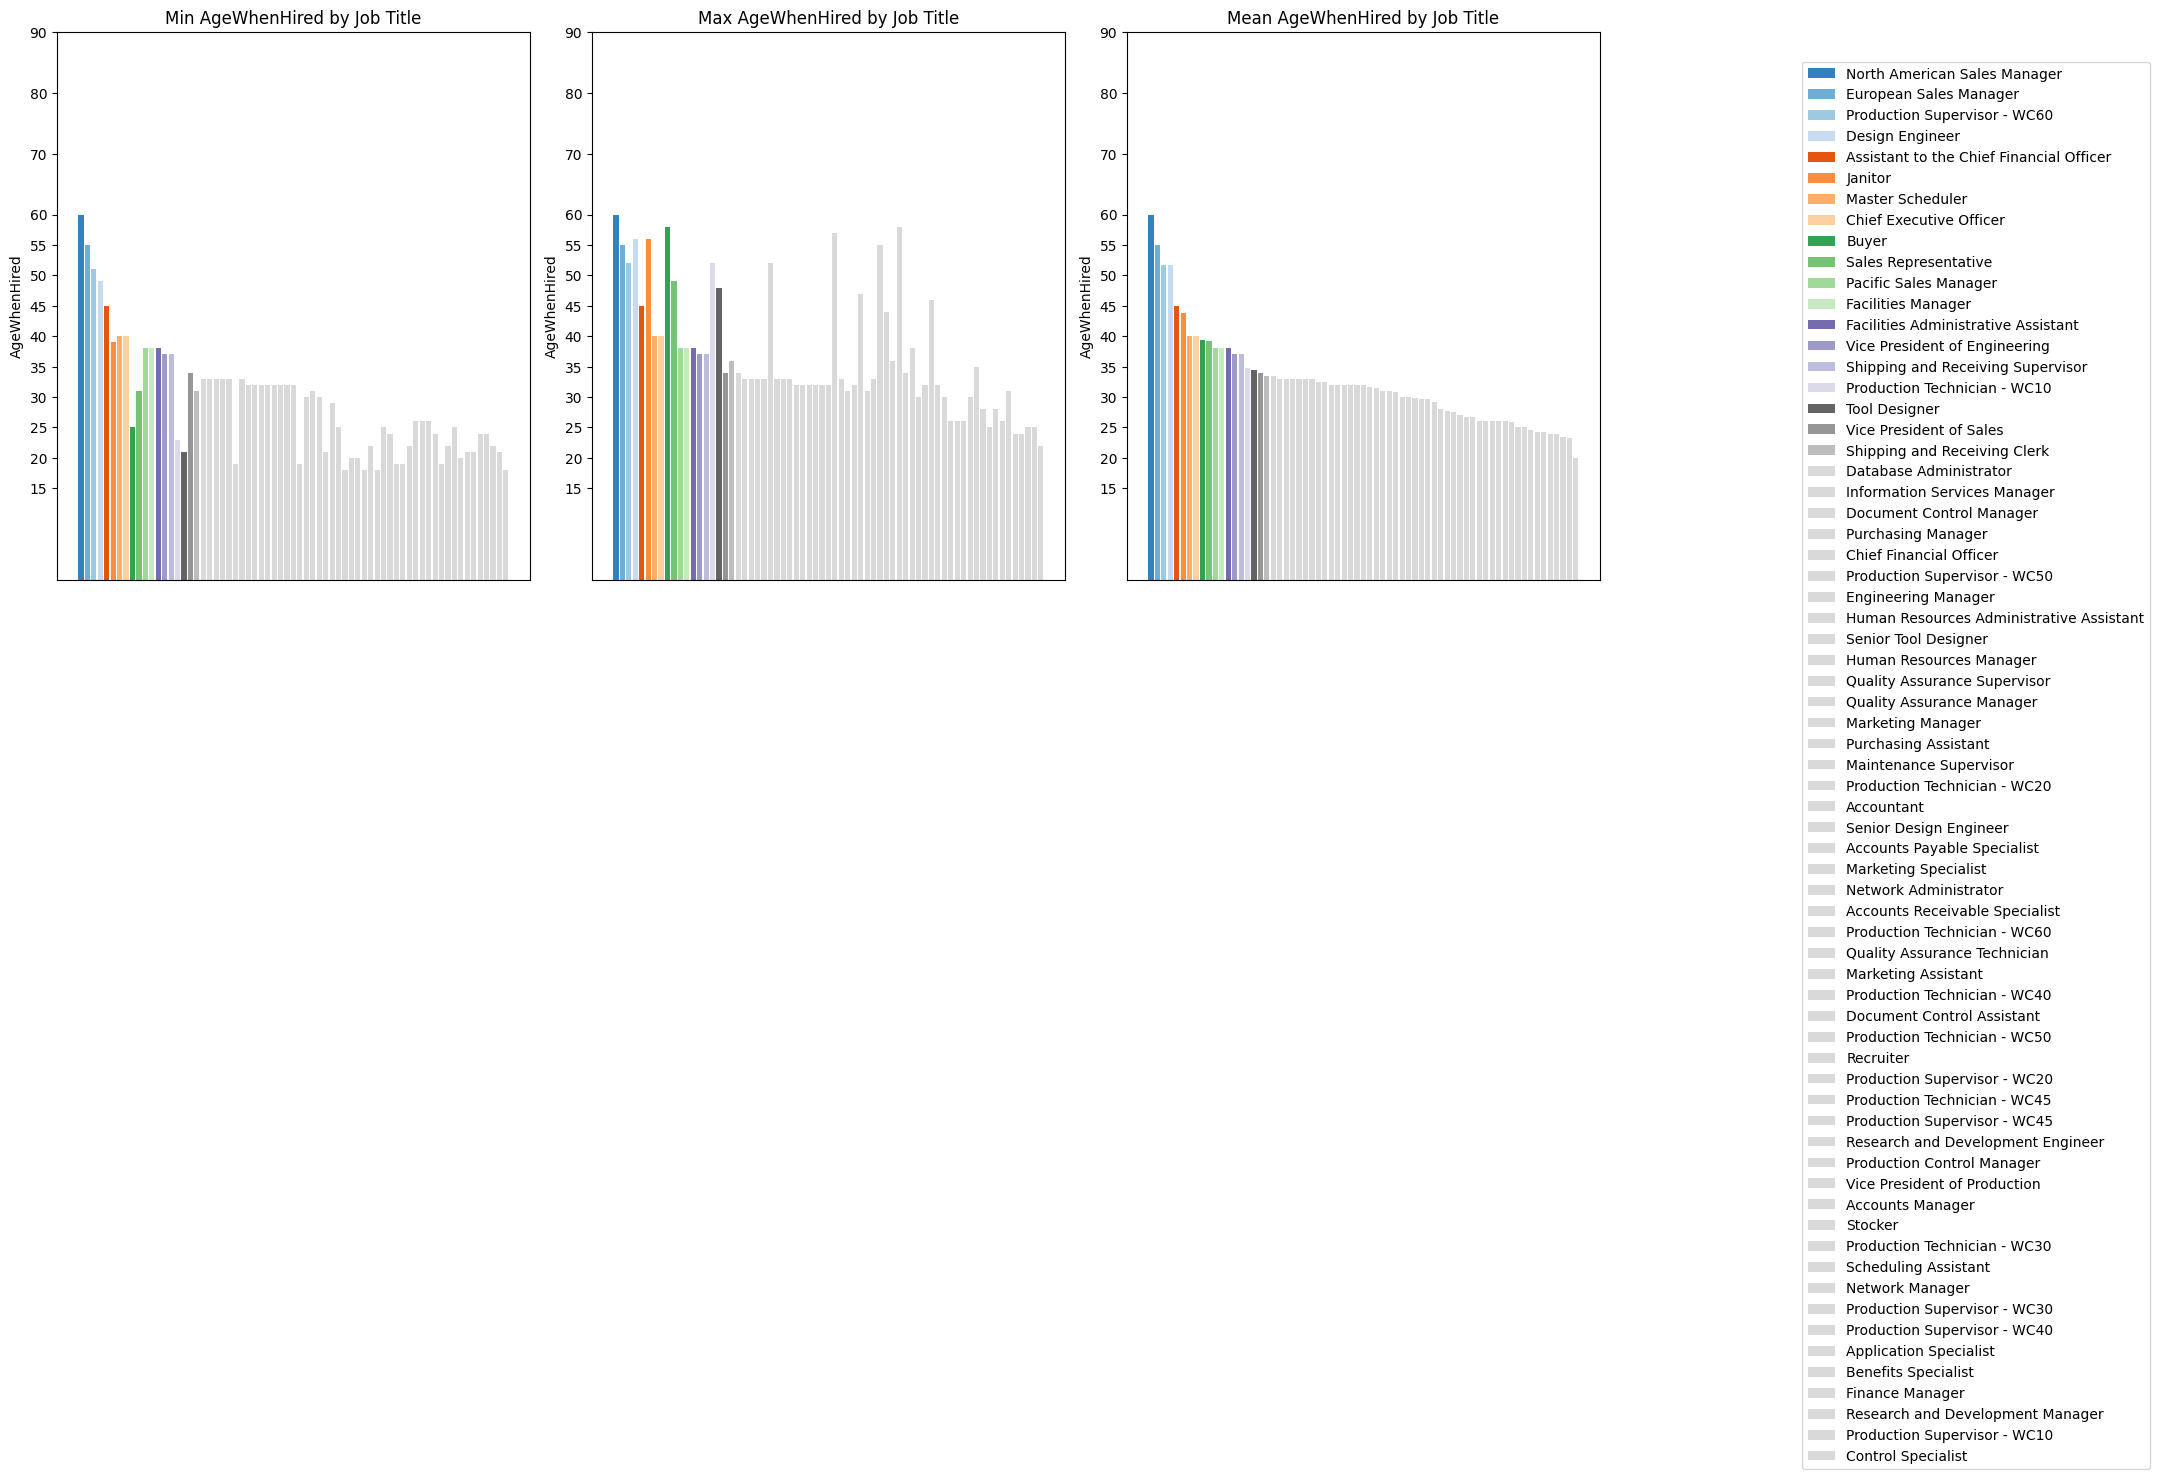

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by the 'mean' column in descending order
occupation_stats_sorted = occupation_stats.sort_values(by='mean', ascending=False)

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Change the layout to 1 row and 3 columns

# Get the number of job titles
num_job_titles = len(occupation_stats_sorted)

# Use a colormap for distinct colors
cmap = plt.get_cmap('tab20c')

# Define custom ticks for the y-axis
custom_ticks = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, 90]

# Plot each bar chart with distinct colors
for ax, stat_type in zip(axes, ['min', 'max', 'mean']):
    bars = ax.bar(range(num_job_titles), occupation_stats_sorted[stat_type], color=cmap(np.arange(num_job_titles)))
    ax.set_title(f'{stat_type.capitalize()} AgeWhenHired by Job Title')
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks(custom_ticks)  # Set custom y-axis ticks
    ax.set_ylabel('AgeWhenHired')

# Add legend outside the plot
fig.legend(bars, occupation_stats_sorted['JobTitle'], loc='upper left', bbox_to_anchor=(1, 0.9))

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rect parameter to leave space for the legend

# Show the plots
plt.show()

In [21]:
from math import sqrt


ceo_salary_data = np.array([40])

# Data för jobbet som Chief Executive Officer
confidence_level = 0.95
ceo_mean = np.mean(ceo_salary_data)

# Kontrollera om urvalsstorleken är större än 1 för att beräkna standardavvikelsen."
if len(ceo_salary_data) > 1:
    ceo_std_dev = np.std(ceo_salary_data, ddof=1) # ddof=1 för provstandardavvikelse 
    t_critical = 2.262  # För ett 95% konfidensintervall med df=1 (urvalsstorlek - 1)
    margin_of_error = t_critical * (ceo_std_dev / sqrt(len(ceo_salary_data)))
    confidence_interval = (ceo_mean - margin_of_error, ceo_mean + margin_of_error)
else:
    margin_of_error = 0
    confidence_interval = (ceo_mean, ceo_mean)
print(f"Konfidensintervall för lön som Chief Executive Officer (95%): {confidence_interval}")   

Konfidensintervall för lön som Chief Executive Officer (95%): (40.0, 40.0)
